<br></br>
<h1><center>Assignment 04</h1></center>
<h1><center> Linear regression </h1></center> 
<h2><center>Benedek Dankó</h2></center>

In [96]:
import seaborn as sns
import pandas as pd
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**1. Load the provided .npy files. You can load it with numpy.**

In [97]:
X=np.load('../data/X.npy')
y=np.load('../data/y.npy')

# check data dimension:
print(shape(X))
print(shape(y))

(1000,)
(1000,)


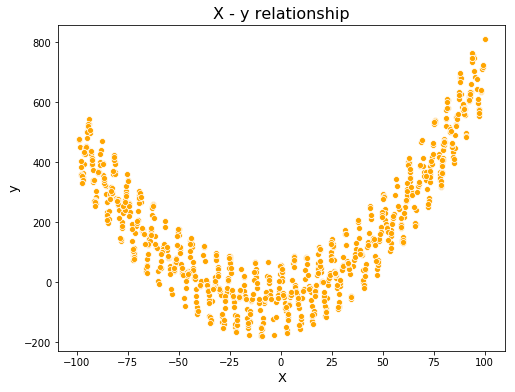

In [98]:
# plot raw data:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(X, y, color='orange')
ax.axes.set_title("X - y relationship",fontsize=16)
ax.set_xlabel("X",fontsize=13)
ax.set_ylabel("y",fontsize=13)
plt.show()

$y = w_0 + w_1\cdot X + w_2 \cdot X^2$

In [99]:
X_matrix = X[:,np.newaxis] # contains only the first dimension (X)
X_matrix = np.c_[X_matrix, X**2] # 2nd dimension added (X**2)

In [100]:
# idea from here: https://stackoverflow.com/questions/33710829/linear-regression-with-quadratic-terms
# fit model:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_matrix, y)
model.score(X_matrix, y) # R squared score (0-1) - higher is better

0.8964612778585026

The R squared score is 0.896, which is good, but could be better.

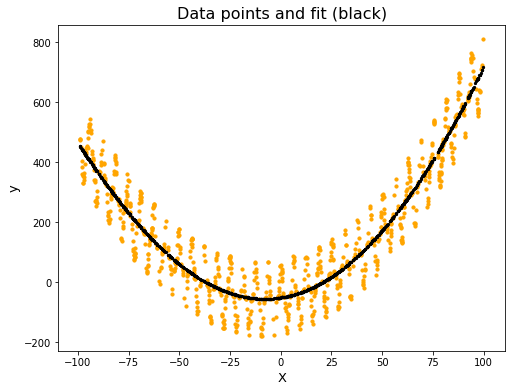

In [101]:
# plot data, predicted values:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X, y,color='orange', s=10)
plt.scatter(X, model.predict(X_matrix),color='k', s=5)
ax.axes.set_title("Data points and fit (black)",fontsize=16)
ax.set_xlabel("X",fontsize=13)
ax.set_ylabel("y",fontsize=13)
plt.show()

**2. Using different features**

In [102]:
# predict Y values:
predicted = model.predict(X_matrix)

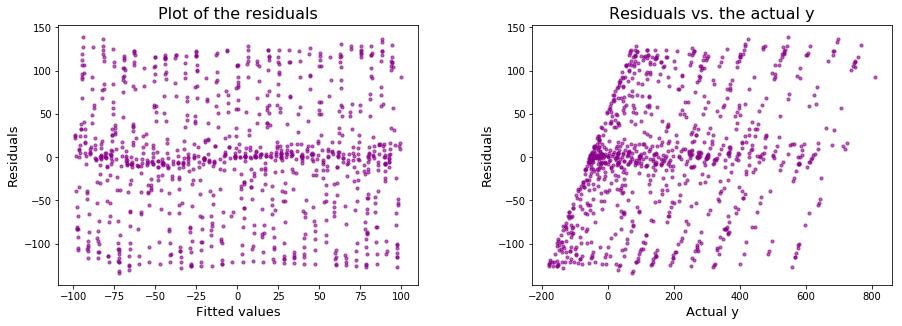

In [103]:
# plot residuals (I added the fitted values vs. residuals too):
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax[0].scatter(X, y-predicted, color='darkmagenta', s=10, alpha=0.6)
ax[0].axes.set_title("Plot of the residuals",fontsize=16)
ax[0].set_xlabel("Fitted values",fontsize=13)
ax[0].set_ylabel("Residuals",fontsize=13)

ax[1].scatter(y, y-predicted, color='darkmagenta', s=10, alpha=0.6)
ax[1].axes.set_title("Residuals vs. the actual y",fontsize=16)
ax[1].set_ylabel("Residuals",fontsize=13)
ax[1].set_xlabel("Actual y",fontsize=13)
fig.tight_layout(pad=6.0)
plt.show()

Residual value: closer to 0 is better (residual: y - predicted). The pattern of the residuals seems not random. The model needs some improvement.

$y = A \cdot X + B \cdot \cos^3(X) + C\cdot X^2 + D$

In [104]:
X_matrix = X[:,np.newaxis] # contains only the first dimension (X)
X_matrix = np.c_[X_matrix, np.cos(X)**3, X**2] # 2nd dimension added (X**2)

In [105]:
model2 = LinearRegression().fit(X_matrix, y)
model2.score(X_matrix, y) # R squared seems great

0.9994070598404952

In [106]:
print('Coefficients: {}'.format(model2.coef_))
print('Intercept: {}'.format(model2.intercept_))

Coefficients: [1.19676853e+00 1.23567661e+02 6.56986322e-02]
Intercept: -50.07109269261798


According to the model, A = 1.19676853e+00, B = 1.23567661e+02, C = 6.56986322e-02, D = -50.07109269261798. <br>
The R squared score is 0.999, which is great, so our model is quite accurate.

In [107]:
# predict y values, based on our new model:
predicted2 = model2.predict(X_matrix)

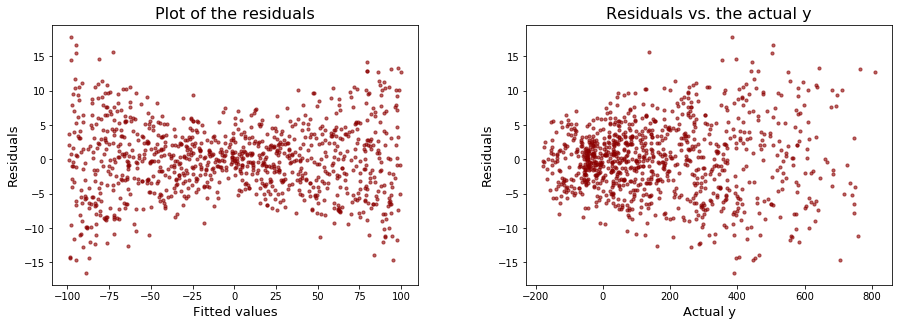

In [108]:
# plot residuals:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax[0].scatter(X, y-predicted2, color='darkred', s=10, alpha=0.6)
ax[0].axes.set_title("Plot of the residuals",fontsize=16)
ax[0].set_xlabel("Fitted values",fontsize=13)
ax[0].set_ylabel("Residuals",fontsize=13)

ax[1].scatter(y, y-predicted2, color='darkred', s=10, alpha=0.6)
ax[1].axes.set_title("Residuals vs. the actual y",fontsize=16)
ax[1].set_ylabel("Residuals",fontsize=13)
ax[1].set_xlabel("Actual y",fontsize=13)
fig.tight_layout(pad=6.0)
plt.show()

The range of the residuals became much narrower (a magnitude lower), and the pattern seems OK.

**3. Other methdods than sklearn for linear regression**

In [109]:
# adding the constant term 
x = sm.add_constant(X_matrix) 
  
# performing the regression 
# and fitting the model 
result = sm.OLS(y, x).fit() 
  
# printing the summary table 
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.596e+05
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:18:09   Log-Likelihood:                -3074.8
No. Observations:                1000   AIC:                             6158.
Df Residuals:                     996   BIC:                             6177.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.0711      0.252   -198.817      0.0

It gave the same intercept (const) and the same coefficients, as well as the same R squared (0.999), and many other useful metric are reported here.

Calculate manually the coefficients:

In [110]:
# code from here: https://towardsdatascience.com/multiple-linear-regression-from-scratch-in-numpy-36a3e8ac8014

class OrdinaryLeastSquares(object):
    def __init__(self):
        self.coefficients = []
    def fit(self, X, y):
        if len(X.shape) == 1: X = self._reshape_x(X)
        
        X = self._concatenate_ones(X)
        self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))
        
    def predict(self, entry):
        b0 = self.coefficients[0]
        other_betas = self.coefficients[1:]
        predict = b0
        
        for xi, bi in zip(entry, other_betas): prediction += (bi*xi)
        return prediction
    
    def _reshape_x(self, x):
        return X.reshape(-1, 1)
    
    def _concatenate_ones(self, X):
        ones = np.ones(shape=X.shape[0]).reshape(-1, 1)
        return np.concatenate((ones, X), 1)

In [111]:
model = OrdinaryLeastSquares()
model.fit(X_matrix, y)
model.coefficients

array([-5.00710927e+01,  1.19676853e+00,  1.23567661e+02,  6.56986322e-02])

Intercept: -50.071, and the coefficients are: 1.197, 123.568, 0.0657. <br>
This gave the same results as well.

**4.**

In [112]:
# load data, drop columns not needed:
df = pd.read_csv('../data/real_estate.csv')
df.drop(['No', 'X5 latitude', 'X6 longitude'], axis=1, inplace=True)

In [113]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [114]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,37.980193
std,0.281967,11.392485,1262.109595,2.945562,13.606488
min,2012.667000,0.000000,23.382840,0.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,117.500000


Check the distribution of the different independent variables:

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


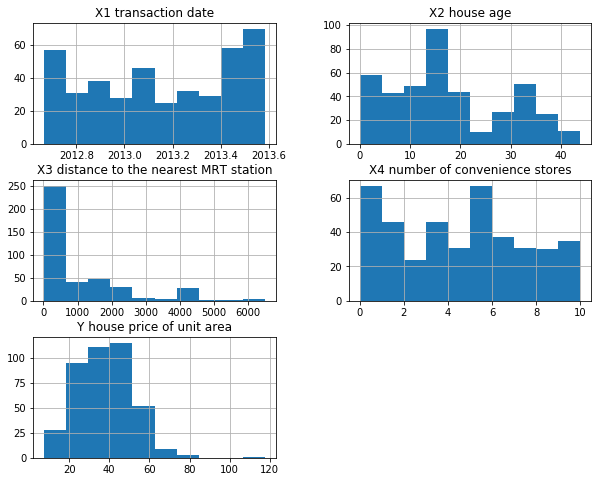

In [115]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
df.hist(ax = ax, bins=10)
plt.show()

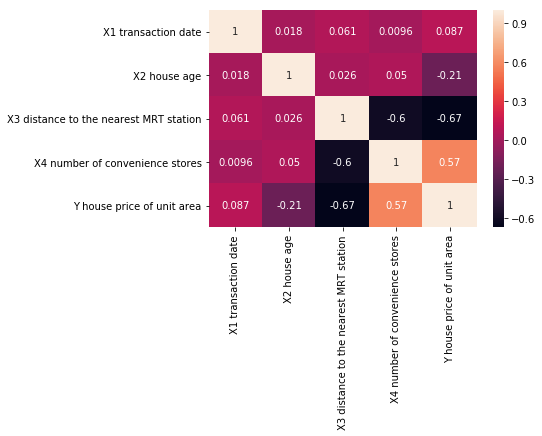

In [116]:
# create corellation matrix, we can check the relationship between the variables:
fig, ax = plt.subplots(figsize=(6, 4))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

X3 and X4 have quite a strong correlation as independent variables. <br>
Y is influenced the most by X3 and X4.

Create X, Y:

In [117]:
X = df[['X1 transaction date', 'X2 house age', 
        'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
Y = df['Y house price of unit area']

In [118]:
# normalize data:
n = Normalizer()
X = n.fit_transform(df[['X1 transaction date', 'X2 house age', 
        'X3 distance to the nearest MRT station', 'X4 number of convenience stores']])

Fit the most simple linear regression:

In [119]:
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
model1.score(X, Y) # not so great...

0.6064681398870873

In [121]:
# check coefficients:
model1.coef_

array([  -4.67878408, -543.28769106,  -36.75237398, 1369.29789624])

In [122]:
# predict Y values:
predicted = model1.predict(X)

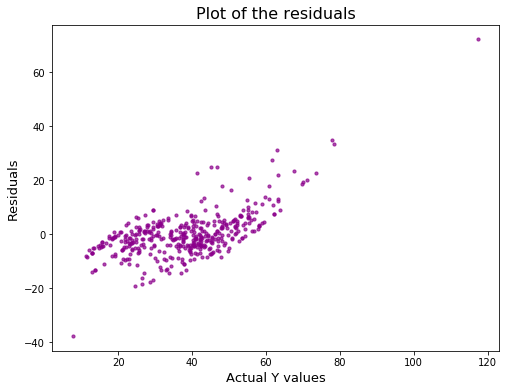

In [123]:
# plot residuals:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(Y, Y-predicted, color='darkmagenta', s=10, alpha=0.7)
ax.axes.set_title("Plot of the residuals",fontsize=16)
ax.set_xlabel("Actual Y values",fontsize=13)
ax.set_ylabel("Residuals",fontsize=13)
plt.show()

In [124]:
# 2nd degree polynomial fit:
model2 = make_pipeline(PolynomialFeatures(interaction_only=False), LinearRegression())
model2.fit(X, Y)
model2.score(X, Y) # a little bit better than previously

0.636193212785849

In [125]:
# check coefficients:
model2.named_steps['linearregression'].coef_

array([ 0.00000000e+00,  1.10427992e+03,  2.64745160e+03,  8.05898192e+02,
        3.27466502e+04, -7.90207293e+14, -4.66761385e+03, -7.07301494e+02,
       -2.85132443e+04, -7.90207293e+14, -1.30413541e+03,  5.63478751e+04,
       -7.90207293e+14, -1.58425264e+04, -7.90207293e+14])

In [126]:
# check R squared score for a few polynomial fit:

xs = []
ys = []
for n in range(1, 16):
    model = make_pipeline(PolynomialFeatures(n, interaction_only=False), LinearRegression())
    model.fit(X, Y)
    xs.append(n)
    ys.append(model.score(X, Y))
    print('Degree {}: score {}'.format(n, model.score(X, Y)))

Degree 1: score 0.6064681398870873
Degree 2: score 0.636193212785849
Degree 3: score 0.47876246467134304
Degree 4: score 0.5604316380143894
Degree 5: score 0.7289930464947643
Degree 6: score 0.6190106893267355
Degree 7: score 0.6217154070789607
Degree 8: score 0.5973029391865387
Degree 9: score 0.6927342317393552
Degree 10: score 0.8562474790740331
Degree 11: score 0.8588958824919098
Degree 12: score 0.7732068712775311
Degree 13: score 0.8896660846224652
Degree 14: score 0.8645090291782629
Degree 15: score 0.8500008242645097


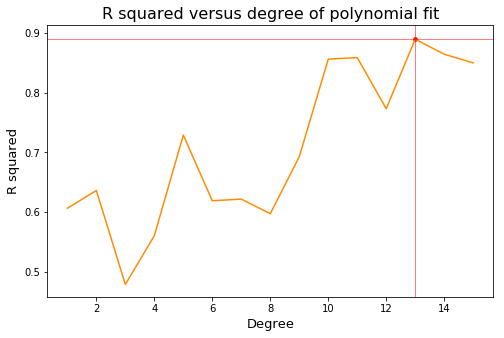

In [127]:
# plot how R squared score changes with increasing polynomial fit degrees:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(xs, ys, color='darkorange')
plt.scatter(xs[ys.index(max(ys))], max(ys), color='red', s=14)
ax.axhline(y=max(ys), xmin=0.0, xmax=xs[ys.index(max(ys))], color='red', lw=0.5)
ax.axvline(x=xs[ys.index(max(ys))], ymin=0.0, ymax=80, color='red', lw=0.5)
ax.axes.set_title("R squared versus degree of polynomial fit",fontsize=16)
ax.set_xlabel("Degree",fontsize=13)
ax.set_ylabel("R squared",fontsize=13)
plt.show()

As we can see here, the 13rd degree polynomial fit has the highest R squared score.

In [128]:
# fit model with 12th degree polynomial:
model3 = make_pipeline(PolynomialFeatures(13, interaction_only=False), LinearRegression())
model3.fit(X, Y)
predicted = model3.predict(X)

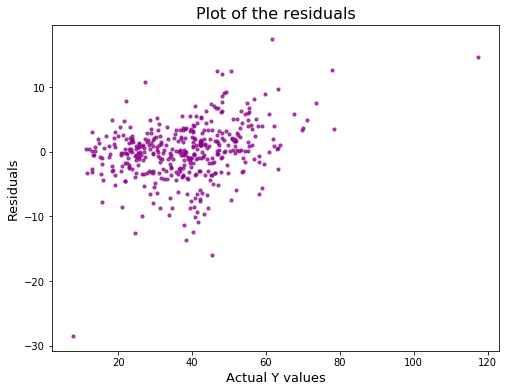

In [129]:
# plot residuals:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(Y, Y-predicted, color='darkmagenta', s=10, alpha=0.7)
ax.axes.set_title("Plot of the residuals",fontsize=16)
ax.set_xlabel("Actual Y values",fontsize=13)
ax.set_ylabel("Residuals",fontsize=13)
plt.show()

In [130]:
model3.score(X, Y) # better now

0.8896660846224652

In [131]:
# check coefficients:
model3.named_steps['linearregression'].coef_

array([-2.11254851e+14,  1.91640848e+13,  6.63392378e+13, ...,
       -4.32826774e+00, -9.70175858e-02,  2.03620523e-03])

In [132]:
model3.named_steps['linearregression'].intercept_

135551890167888.98

**5.**

These coefficients show the betas associated with each independent variable, variable interactions, and squared variables (since we had polynomial fit). <br>
But for example if we have a coefficient beta1 = z associated with X1 independent variable, this means that 1 unit change in X1 is associated with z unit change in y dependent variable.

In [133]:
shape(Y)

(414,)

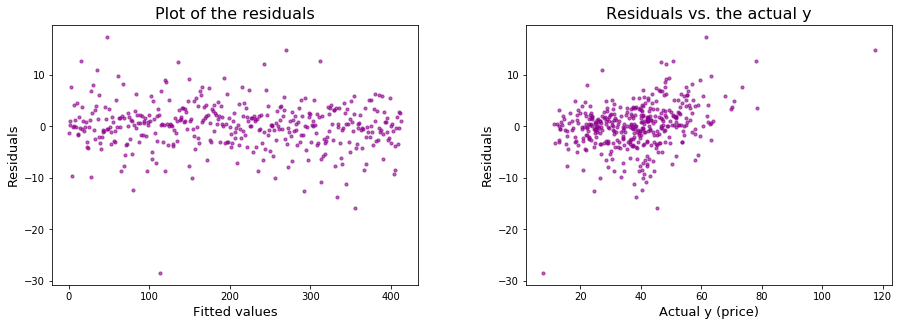

In [134]:
# plot residuals (I added the fitted values vs. residuals too):
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax[0].scatter([i for i in range(df.shape[0])], Y-predicted, color='darkmagenta', s=10, alpha=0.6)
ax[0].axes.set_title("Plot of the residuals",fontsize=16)
ax[0].set_xlabel("Fitted values",fontsize=13)
ax[0].set_ylabel("Residuals",fontsize=13)

ax[1].scatter(Y, Y-predicted, color='darkmagenta', s=10, alpha=0.6)
ax[1].axes.set_title("Residuals vs. the actual y",fontsize=16)
ax[1].set_ylabel("Residuals",fontsize=13)
ax[1].set_xlabel("Actual y (price)",fontsize=13)
fig.tight_layout(pad=6.0)
plt.show()

The lower the residual value, the more worth it to buy that house. Because this means, that the predicted value is higher than the actucal price of that house (residual = Y - predicted).

In [135]:
print('I would by the house with {} index (starting from 1).'.format(list(Y-predicted).index(min(Y-predicted)) + 1))
print('The actual price of this house is: {}.'.format(Y[list(Y-predicted).index(min(Y-predicted))]))

I would by the house with 114 index (starting from 1).
The actual price of this house is: 7.6.
